In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_49422_Z')

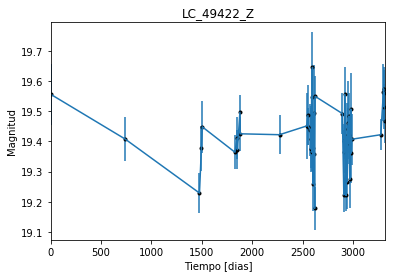

In [2]:
data = np.genfromtxt('LC_49422_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_49422_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

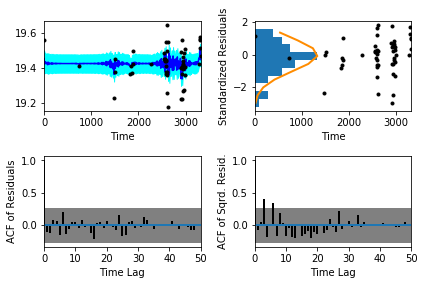

In [5]:
sample.assess_fit()

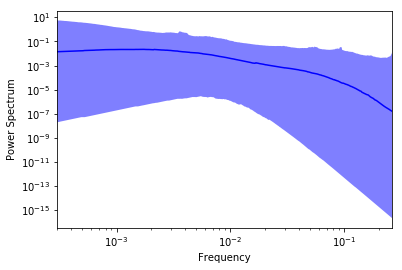

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_49422_Z')

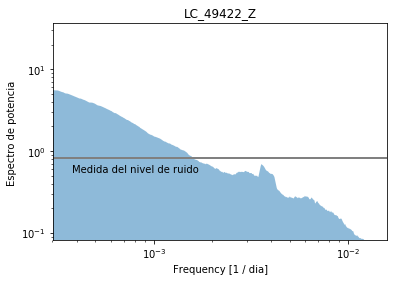

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_49422_Z')

Text(0.5,1,'Prediccion , valor esperado LC_49422_Z')

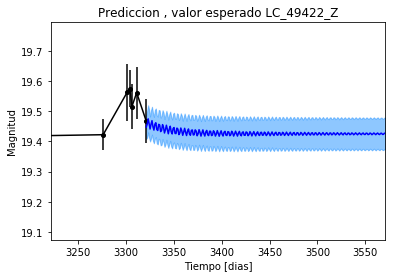

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_49422_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_ 49422_Z')

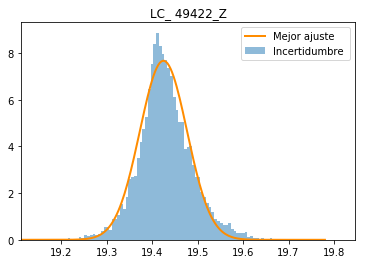

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_ 49422_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_49422_Z')

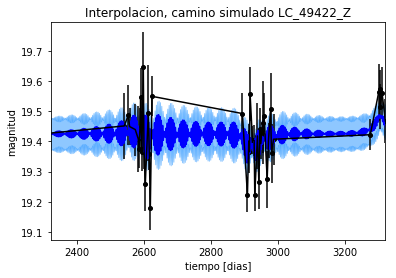

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_49422_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_49422_Z')

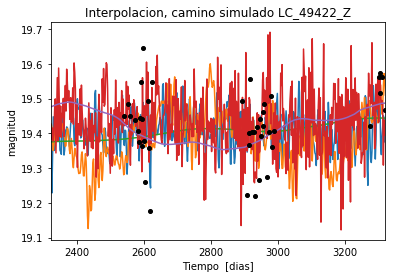

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_49422_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 469.845365578
Median: 0.00867087008924
Standard deviation: 0.0943305984923
68% credibility interval: [ 0.00081195  0.08855282]
95% credibility interval: [  3.46201054e-04   3.73918356e-01]
99% credibility interval: [  3.15333366e-04   4.93063059e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 917.735698229
Median: 0.00487841079336
Standard deviation: 0.0711178363887
68% credibility interval: [ 0.00065008  0.05347631]
95% credibility interval: [ 0.0003462   0.27453697]
99% credibility interval: [  3.12249311e-04   4.68405735e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 400.443388244
Median: 0.0234036255643
Standar

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 382.754982533
Median: 72.1911134472
Standard deviation: 1.73293523868
68% credibility interval: [ 70.60917403  73.57098453]
95% credibility interval: [ 68.3233503   75.44072261]
99% credibility interval: [ 66.00988961  76.98051138]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 679.106024808
Median: 0.685899192635
Standard deviation: 1.39143079345
68% credibility interval: [ 0.06674388  2.62932637]
95% credibility interval: [ 0.01472474  4.98350581]
99% credibility interval: [ 0.01076915  6.39270847]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 184.949309633
Median: 0.950570220047
Standard deviation: 3.98891134935
68% credibility interval: [ 0.05422933  6.33233381]
95% credibility interval: [  2.60725485e-0

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4836.64670155
Median: 1.57661474791e-20
Standard deviation: 2.16272491503e+87
68% credibility interval: [  8.21655808e-80   1.56022952e+58]
95% credibility interval: [  5.43269096e-108   1.35071769e+084]
99% credibility interval: [  6.47343119e-127   1.46944467e+087]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2321.77352672
Median: 19.4136013858
Standard deviation: 0.0232587823238
68% credibility interval: [ 19.3967109   19.43273891]
95% credibility interval: [ 19.37484602  19.46446651]
99% credibility interval: [ 19.34316479  19.50518002]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 193.98648976
Median: 0.0927846511707
Standard deviation: 0.154705516447
68% credibility interval: [ 0.00158736  0.32881073]
95% credibility interval: [ 0.          0.49294043]
99% credibility interval: [ 0.          0.51785731]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 193.98648976
Median: 0.0927846511707
Standard deviation: 0.154705516447
68% credibility interval: [ 0.00158736  0.32881073]
95% credibility interval: [ 0.          0.49294043]
99% credibility interval: [ 0.          0.51785731]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 98.4441988974
Median: 0.0
Standard deviation: 0.0604950767699
68% credib

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 382.754982533
Median: 72.1911134472
Standard deviation: 1.73293523868
68% credibility interval: [ 70.60917403  73.57098453]
95% credibility interval: [ 68.3233503   75.44072261]
99% credibility interval: [ 66.00988961  76.98051138]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3080.25996874
Median: 0.00267782542512
Standard deviation: 0.00466704769054
68% credibility interval: [ 0.00082112  0.00564864]
95% credibility interval: [  7.45976560e-05   1.27877013e-02]
99% credibility interval: [  2.96051727e-06   2.66797261e-02]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 971.402087335
Median: 1.18910319939
Standard deviation: 0.218009580355
68% credibility interval: [ 0.97874187  1.41002798]
95% credibility interval: [ 0.78908569  1.65406794]
99% credibility interval: [ 0.6949023   1.83582652]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 247.511146243
Median: 1.0202839069e-05
Standard deviation: 0.160878201569
68% credibility interval: [  2.92613638e-60   1.11942133e-02]
95% credibility interval: [  5.26674835e-88   3.59735480e-01]
99% credibility interval: [  4.63453251e-90   1.22967828e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 469.845365578
Median: (-0.0544806835452-0.951139838587j)
Standard deviation: 1.13848922764
68% credibility interval: [-0.55639379-1.29332516j -0.00510165-0.32642388j]
95% credibility interval: [ -2.34939832e+00-1.08923825j  -2.17524537e-03-1.66870689j]
99% credibility interval: [ -3.09800657e+00-1.24034112j  -1.98129797e-03-0.0079672j ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 917.735698229
Median: (-0.0306519590192+2.85417817256j)
Standard deviation: 1.06983188407
68% credibility interval: [-0.33600154+0.30455847j -0.00408454+2.10799993j]
95% credibility interval: [-1.72496664+1.08941191j -0.00217525+1.66870689j]
99% credibility interval: [ -2.94308003e+00+0.88944922j  -1.96192029e-03+0.57770611j]
Posterior sum